In [1]:
import numpy as np
import pandas as pd
import os

from lib.plotting import *
from lib.preferences import *

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.patches as patches
import seaborn as sns

import matplotlib.gridspec as gridspec

# inline stylization
%matplotlib inline
sns.set_style("ticks")
sns.set_style('white')
#sns.set_style("ticks")
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 100
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True

## Load averaged simulation results

In [3]:
bin_path = "../analysis/2020-04-30_art-intv/"

In [4]:
# LOAD PREVALENCE AND DIVERSITY
print("Loading prevalence and diversity data.")
ops_mean = pd.read_csv(bin_path + "/ops_mean.csv")
ops_std = pd.read_csv(bin_path + "/ops_stds.csv")
ops_se = pd.read_csv(bin_path + "/ops_se.csv")
ogs_mean = pd.read_csv(bin_path + "/ogs_mean.csv")
ogs_std = pd.read_csv(bin_path + "/ogs_stds.csv")
ogs_se = pd.read_csv(bin_path + "/ogs_se.csv")
epoch_df = pd.read_csv(bin_path + "/epoch_df.csv")
epoch_df.index = epoch_df.name

Loading prevalence and diversity data.


## Prepare for plotting

In [5]:
savefig = True

In [6]:
epoch_df

,name,t0,t1,gen_rate,gens,x_h,x_v
name,,,,,,,
init,init,0.000000,53615.384615,265.764957,1.424909e+07,0.653846,0.075556
InitVar,InitVar,53615.384615,57265.384615,265.764957,9.700421e+05,0.653846,0.075556
Crash,Crash,57265.384615,73665.384615,255.358400,4.187878e+06,0.199708,0.024356
CrashVar,CrashVar,73665.384615,77315.384615,255.358400,9.320582e+05,0.199708,0.024356
Recovery,Recovery,77315.384615,130930.769231,265.764957,1.424909e+07,0.653846,0.075556


In [7]:
time_limits = (epoch_df.loc["InitVar", "t0"], epoch_df.loc["CrashVar", "t1"] + 3650) 

In [8]:
se_alpha=0.25

## Plot prevalence

In [9]:
op = ops_mean
op_se = ops_se

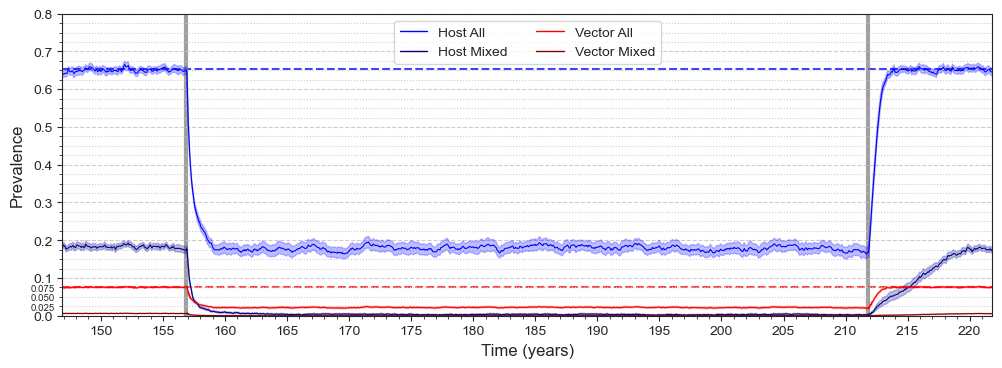

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
# Host Prevalence
ax.plot(op["t0"], op["HX"], color="blue", linewidth=0.8, label="Host All")
ax.fill_between(x=op["t0"],
                y1=op["HX"] - op_se["HX"] * n_se,
                y2=op["HX"] + op_se["HX"] * n_se,
                color="blue", alpha=se_alpha)
ax.plot(op["t0"], op["HmX"], color="darkblue", linewidth=0.8, label="Host Mixed")
ax.fill_between(x=op["t0"],
                y1=op["HmX"] - op_se["HmX"] * n_se,
                y2=op["HmX"] + op_se["HmX"] * n_se,
                color="darkblue", alpha=se_alpha)
# Vector Prevalence
ax.plot(op["t0"], op["VX"], color="red", linewidth=0.8, label="Vector All")
ax.fill_between(x=op["t0"],
                y1=op["VX"] - op_se["VX"] * n_se,
                y2=op["VX"] + op_se["VX"] * n_se,
                color="red", alpha=se_alpha)
ax.plot(op["t0"], op["VmX"], color="darkred", linewidth=0.8, label="Vector Mixed")
ax.fill_between(x=op["t0"],
                y1=op["VmX"] - op_se["VmX"] * n_se,
                y2=op["VmX"] + op_se["VmX"] * n_se,
                color="darkred", alpha=se_alpha)

# Delineate Equilibriums
ax.axhline(epoch_df.loc["init", "x_h"], 
           color="blue", linestyle='dashed', alpha=0.75,
           zorder=-1)
ax.axhline(epoch_df.loc["init", "x_v"], 
           color="red", linestyle='dashed', alpha=0.75,
           zorder=-1)


# Delineate Epochs
ax.axvline(epoch_df.loc["Crash", "t0"], 
           color="grey", alpha=0.75,
           linewidth=3,
           zorder=-1)
ax.axvline(epoch_df.loc["Recovery", "t0"], 
           color="grey", alpha=0.75,
           linewidth=3,
           zorder=-1)


# Limits
ax.set_ylim([0, 0.8])
if time_limits is not None:
    ax.set_xlim(time_limits)
else:
    epoch_t0 = epoch_df.iloc[0].t0
    epoch_t1 = epoch_df.iloc[-1].t1
    time_limits = [epoch_t0, epoch_t1]
    ax.set_xlim(time_limits)
    
# Ticks, y-axis
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.025))
ax.yaxis.set_minor_formatter(plt.FuncFormatter(lambda val, num: "%.03f" % val if num <= 3 else ""))
ax.tick_params('y', which='minor', labelsize=7)

# Ticks, x-axis
days_per_year = 365
years_per_major_tick = 5

# ax.tick_params(axis='both', which='major', direction='in', length=10, labelsize=10)
# ax.tick_params(axis='both', which='minor', direction='in', length=8, labelsize=10)
ax.xaxis.set_major_locator(plt.MultipleLocator(days_per_year * years_per_major_tick))
ax.xaxis.set_minor_locator(plt.MultipleLocator(days_per_year))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda v, i : int(v / days_per_year)))


# Labels
ax.set_ylabel("Prevalence", fontsize=12)
ax.set_xlabel("Time (years)", fontsize=12)

# Grid
ax.grid(axis="y", linestyle="dashed", zorder=-2)
ax.grid(axis="y", which="minor", linestyle="dotted", zorder=-2)

# Legend
leg = ax.legend(loc="upper center", ncol=2, fontsize=10)
for l in leg.legendHandles:
    l.set_linewidth(1.0)
    
if savefig:
    fig.savefig("../figs/timecourse_intervention-avg_prev.pdf", 
                bbox_inches="tight", pad_inches=0.5)
    fig.savefig("../figs/timecourse_intervention-avg_prev.png", 
                bbox_inches="tight", pad_inches=0.5)

## Version 2

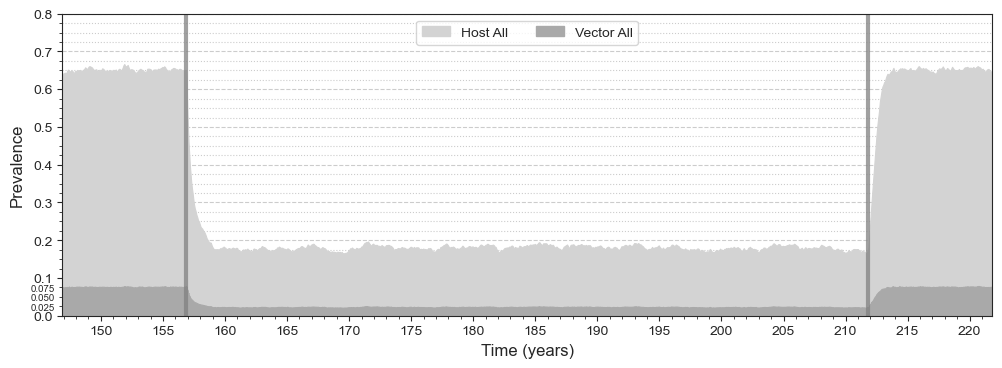

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))

# Host Prevalence
ax.fill_between(x=op["t0"], y1=0, y2=op["HX"], color="lightgrey", linewidth=0.8, label="Host All")

# Vector Prevalence
ax.fill_between(x=op["t0"], y1=0, y2=op["VX"], color="darkgrey", linewidth=0.8, label="Vector All")


# Delineate Epochs
ax.axvline(epoch_df.loc["Crash", "t0"], 
           color="grey", alpha=0.75,
           linewidth=3,
           zorder=2)
ax.axvline(epoch_df.loc["Recovery", "t0"], 
           color="grey", alpha=0.75,
           linewidth=3,
           zorder=2)


# Limits
ax.set_ylim([0, 0.8])
if time_limits is not None:
    ax.set_xlim(time_limits)
else:
    epoch_t0 = epoch_df.iloc[0].t0
    epoch_t1 = epoch_df.iloc[-1].t1
    time_limits = [epoch_t0, epoch_t1]
    ax.set_xlim(time_limits)
    
# Ticks, y-axis
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.025))
ax.yaxis.set_minor_formatter(plt.FuncFormatter(lambda val, num: "%.03f" % val if num <= 3 else ""))
ax.tick_params('y', which='minor', labelsize=7)

# Ticks, x-axis
days_per_year = 365
years_per_major_tick = 5

# ax.tick_params(axis='both', which='major', direction='in', length=10, labelsize=10)
# ax.tick_params(axis='both', which='minor', direction='in', length=8, labelsize=10)
ax.xaxis.set_major_locator(plt.MultipleLocator(days_per_year * years_per_major_tick))
ax.xaxis.set_minor_locator(plt.MultipleLocator(days_per_year))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda v, i : int(v / days_per_year)))


# Labels
ax.set_ylabel("Prevalence", fontsize=12)
ax.set_xlabel("Time (years)", fontsize=12)

# Grid
ax.grid(axis="y", linestyle="dashed", zorder=-2)
ax.grid(axis="y", which="minor", linestyle="dotted", zorder=-2)

# Legend
leg = ax.legend(loc="upper center", ncol=2, fontsize=10)
for l in leg.legendHandles:
    l.set_linewidth(1.0)

## Add genetics

In [12]:
og = ogs_mean
og_se = ogs_se

In [13]:
metrics = ["pi", "mean_k", "avg_l_ibd", "tajd"]
metric_cols = sns.color_palette("Set1", len(metrics))
m_dt = dict(zip(metrics, metric_cols))

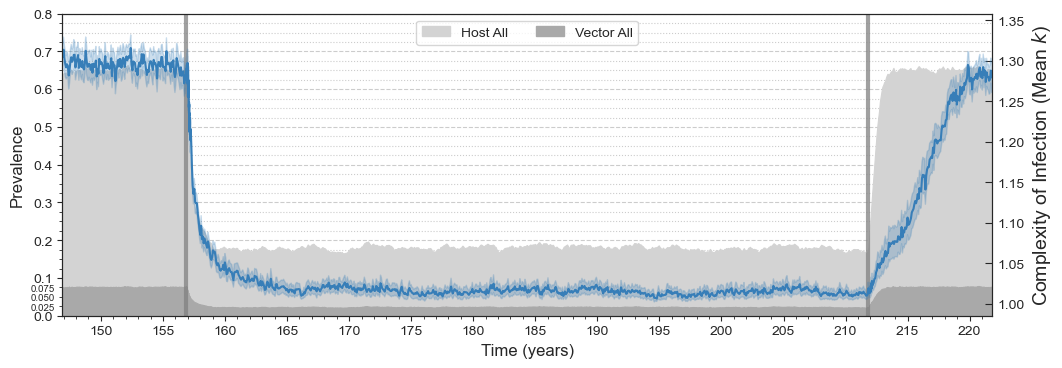

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))


# Host Prevalence
ax.fill_between(x=op["t0"], y1=0, y2=op["HX"], color="lightgrey", linewidth=0.8, label="Host All")

# Vector Prevalence
ax.fill_between(x=op["t0"], y1=0, y2=op["VX"], color="darkgrey", linewidth=0.8, label="Vector All")



# Delineate Epochs
ax.axvline(epoch_df.loc["Crash", "t0"], 
           color="grey", alpha=0.75,
           linewidth=3,
           zorder=2)
ax.axvline(epoch_df.loc["Recovery", "t0"], 
           color="grey", alpha=0.75,
           linewidth=3,
           zorder=2)


# Limits
ax.set_ylim([0, 0.8])
if time_limits is not None:
    ax.set_xlim(time_limits)
else:
    epoch_t0 = epoch_df.iloc[0].t0
    epoch_t1 = epoch_df.iloc[-1].t1
    time_limits = [epoch_t0, epoch_t1]
    ax.set_xlim(time_limits)
    
# Ticks, y-axis
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.025))
ax.yaxis.set_minor_formatter(plt.FuncFormatter(lambda val, num: "%.03f" % val if num <= 3 else ""))
ax.tick_params('y', which='minor', labelsize=7)

# Ticks, x-axis
days_per_year = 365
years_per_major_tick = 5

# ax.tick_params(axis='both', which='major', direction='in', length=10, labelsize=10)
# ax.tick_params(axis='both', which='minor', direction='in', length=8, labelsize=10)
ax.xaxis.set_major_locator(plt.MultipleLocator(days_per_year * years_per_major_tick))
ax.xaxis.set_minor_locator(plt.MultipleLocator(days_per_year))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda v, i : int(v / days_per_year)))


# Labels
ax.set_ylabel("Prevalence", fontsize=12)
ax.set_xlabel("Time (years)", fontsize=12)

# Grid
ax.grid(axis="y", linestyle="dashed", zorder=-2)
ax.grid(axis="y", which="minor", linestyle="dotted", zorder=-2)

# Legend
leg = ax.legend(loc="upper center", ncol=2, fontsize=10)
for l in leg.legendHandles:
    l.set_linewidth(1.0)
    
    
# Plot Genetic Diversity Lines
metric = "mean_k"
# Twin axisa
axm = ax.twinx()

# Plot
axm.plot(og["t0"], og[metric], color=m_dt[metric], linewidth=1.5)
axm.fill_between(x=og["t0"],
                 y1=og[metric] - og_se[metric] * n_se,
                 y2=og[metric] + og_se[metric] * n_se,
                 color=m_dt[metric], alpha=se_alpha)
axm.set_ylabel(genetic_names[metric], fontsize=14)
axm.tick_params(axis='y', which='major', direction='in', length=5, labelsize=10)
axm.set_xlim(time_limits)
    
if savefig:
    fig.savefig("../figs/timecourse_intervention-avg_%s.pdf" % metric, 
                bbox_inches="tight", pad_inches=0.5)
    fig.savefig("../figs/timecourse_intervention-avg_%s.png" % metric, 
                bbox_inches="tight", pad_inches=0.5)

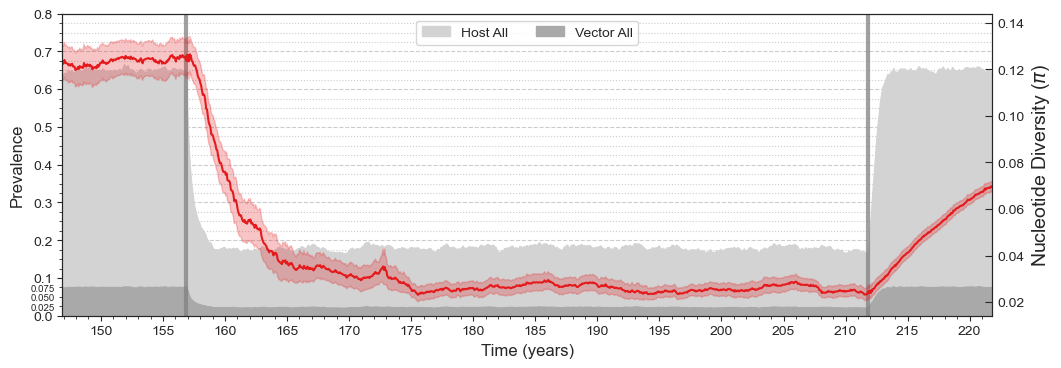

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))


# Host Prevalence
ax.fill_between(x=op["t0"], y1=0, y2=op["HX"], color="lightgrey", linewidth=0.8, label="Host All")

# Vector Prevalence
ax.fill_between(x=op["t0"], y1=0, y2=op["VX"], color="darkgrey", linewidth=0.8, label="Vector All")



# Delineate Epochs
ax.axvline(epoch_df.loc["Crash", "t0"], 
           color="grey", alpha=0.75,
           linewidth=3,
           zorder=2)
ax.axvline(epoch_df.loc["Recovery", "t0"], 
           color="grey", alpha=0.75,
           linewidth=3,
           zorder=2)


# Limits
ax.set_ylim([0, 0.8])
if time_limits is not None:
    ax.set_xlim(time_limits)
else:
    epoch_t0 = epoch_df.iloc[0].t0
    epoch_t1 = epoch_df.iloc[-1].t1
    time_limits = [epoch_t0, epoch_t1]
    ax.set_xlim(time_limits)
    
# Ticks, y-axis
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.025))
ax.yaxis.set_minor_formatter(plt.FuncFormatter(lambda val, num: "%.03f" % val if num <= 3 else ""))
ax.tick_params('y', which='minor', labelsize=7)

# Ticks, x-axis
days_per_year = 365
years_per_major_tick = 5

# ax.tick_params(axis='both', which='major', direction='in', length=10, labelsize=10)
# ax.tick_params(axis='both', which='minor', direction='in', length=8, labelsize=10)
ax.xaxis.set_major_locator(plt.MultipleLocator(days_per_year * years_per_major_tick))
ax.xaxis.set_minor_locator(plt.MultipleLocator(days_per_year))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda v, i : int(v / days_per_year)))


# Labels
ax.set_ylabel("Prevalence", fontsize=12)
ax.set_xlabel("Time (years)", fontsize=12)

# Grid
ax.grid(axis="y", linestyle="dashed", zorder=-2)
ax.grid(axis="y", which="minor", linestyle="dotted", zorder=-2)

# Legend
leg = ax.legend(loc="upper center", ncol=2, fontsize=10)
for l in leg.legendHandles:
    l.set_linewidth(1.0)
    
    
# Plot Genetic Diversity Lines
metric = "pi"
# Twin axisa
axm = ax.twinx()

# Plot
axm.plot(og["t0"], og[metric], color=m_dt[metric], linewidth=1.5)
axm.fill_between(x=og["t0"],
                 y1=og[metric] - og_se[metric] * n_se,
                 y2=og[metric] + og_se[metric] * n_se,
                 color=m_dt[metric], alpha=se_alpha)
axm.set_ylabel(genetic_names[metric], fontsize=14)
axm.tick_params(axis='y', which='major', direction='in', length=5, labelsize=10)
axm.set_xlim(time_limits)
    
if savefig:
    fig.savefig("../figs/timecourse_intervention-avg_%s.pdf" % metric, 
                bbox_inches="tight", pad_inches=0.5)
    fig.savefig("../figs/timecourse_intervention-avg_%s.png" % metric, 
                bbox_inches="tight", pad_inches=0.5)

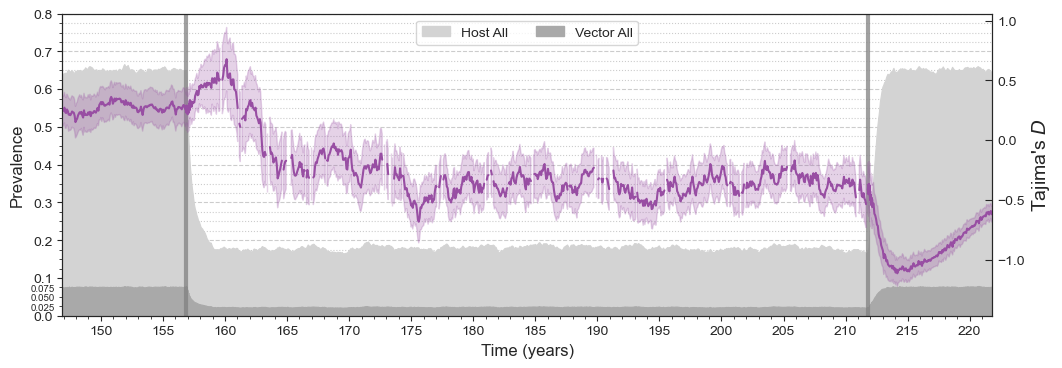

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))


# Host Prevalence
ax.fill_between(x=op["t0"], y1=0, y2=op["HX"], color="lightgrey", linewidth=0.8, label="Host All")

# Vector Prevalence
ax.fill_between(x=op["t0"], y1=0, y2=op["VX"], color="darkgrey", linewidth=0.8, label="Vector All")



# Delineate Epochs
ax.axvline(epoch_df.loc["Crash", "t0"], 
           color="grey", alpha=0.75,
           linewidth=3,
           zorder=2)
ax.axvline(epoch_df.loc["Recovery", "t0"], 
           color="grey", alpha=0.75,
           linewidth=3,
           zorder=2)


# Limits
ax.set_ylim([0, 0.8])
if time_limits is not None:
    ax.set_xlim(time_limits)
else:
    epoch_t0 = epoch_df.iloc[0].t0
    epoch_t1 = epoch_df.iloc[-1].t1
    time_limits = [epoch_t0, epoch_t1]
    ax.set_xlim(time_limits)
    
# Ticks, y-axis
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.025))
ax.yaxis.set_minor_formatter(plt.FuncFormatter(lambda val, num: "%.03f" % val if num <= 3 else ""))
ax.tick_params('y', which='minor', labelsize=7)

# Ticks, x-axis
days_per_year = 365
years_per_major_tick = 5

# ax.tick_params(axis='both', which='major', direction='in', length=10, labelsize=10)
# ax.tick_params(axis='both', which='minor', direction='in', length=8, labelsize=10)
ax.xaxis.set_major_locator(plt.MultipleLocator(days_per_year * years_per_major_tick))
ax.xaxis.set_minor_locator(plt.MultipleLocator(days_per_year))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda v, i : int(v / days_per_year)))


# Labels
ax.set_ylabel("Prevalence", fontsize=12)
ax.set_xlabel("Time (years)", fontsize=12)

# Grid
ax.grid(axis="y", linestyle="dashed", zorder=-2)
ax.grid(axis="y", which="minor", linestyle="dotted", zorder=-2)

# Legend
leg = ax.legend(loc="upper center", ncol=2, fontsize=10)
for l in leg.legendHandles:
    l.set_linewidth(1.0)
    
    
# Plot Genetic Diversity Lines
metric = "tajd"
# Twin axisa
axm = ax.twinx()

# Plot
axm.plot(og["t0"], og[metric], color=m_dt[metric], linewidth=1.5)
axm.fill_between(x=og["t0"],
                 y1=og[metric] - og_se[metric] * n_se,
                 y2=og[metric] + og_se[metric] * n_se,
                 color=m_dt[metric], alpha=se_alpha)
axm.set_ylabel(genetic_names[metric], fontsize=14)
axm.tick_params(axis='y', which='major', direction='in', length=5, labelsize=10)
axm.set_xlim(time_limits)
    
if savefig:
    fig.savefig("../figs/timecourse_intervention-avg_%s.pdf" % metric, 
                bbox_inches="tight", pad_inches=0.5)
    fig.savefig("../figs/timecourse_intervention-avg_%s.png" % metric, 
                bbox_inches="tight", pad_inches=0.5)

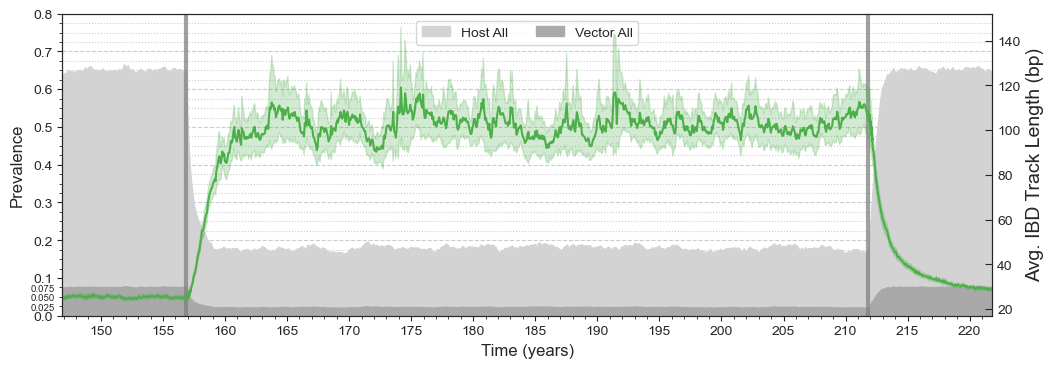

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))


# Host Prevalence
ax.fill_between(x=op["t0"], y1=0, y2=op["HX"], color="lightgrey", linewidth=0.8, label="Host All")

# Vector Prevalence
ax.fill_between(x=op["t0"], y1=0, y2=op["VX"], color="darkgrey", linewidth=0.8, label="Vector All")



# Delineate Epochs
ax.axvline(epoch_df.loc["Crash", "t0"], 
           color="grey", alpha=0.75,
           linewidth=3,
           zorder=2)
ax.axvline(epoch_df.loc["Recovery", "t0"], 
           color="grey", alpha=0.75,
           linewidth=3,
           zorder=2)


# Limits
ax.set_ylim([0, 0.8])
if time_limits is not None:
    ax.set_xlim(time_limits)
else:
    epoch_t0 = epoch_df.iloc[0].t0
    epoch_t1 = epoch_df.iloc[-1].t1
    time_limits = [epoch_t0, epoch_t1]
    ax.set_xlim(time_limits)
    
# Ticks, y-axis
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.025))
ax.yaxis.set_minor_formatter(plt.FuncFormatter(lambda val, num: "%.03f" % val if num <= 3 else ""))
ax.tick_params('y', which='minor', labelsize=7)

# Ticks, x-axis
days_per_year = 365
years_per_major_tick = 5

# ax.tick_params(axis='both', which='major', direction='in', length=10, labelsize=10)
# ax.tick_params(axis='both', which='minor', direction='in', length=8, labelsize=10)
ax.xaxis.set_major_locator(plt.MultipleLocator(days_per_year * years_per_major_tick))
ax.xaxis.set_minor_locator(plt.MultipleLocator(days_per_year))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda v, i : int(v / days_per_year)))


# Labels
ax.set_ylabel("Prevalence", fontsize=12)
ax.set_xlabel("Time (years)", fontsize=12)

# Grid
ax.grid(axis="y", linestyle="dashed", zorder=-2)
ax.grid(axis="y", which="minor", linestyle="dotted", zorder=-2)

# Legend
leg = ax.legend(loc="upper center", ncol=2, fontsize=10)
for l in leg.legendHandles:
    l.set_linewidth(1.0)
    
    
# Plot Genetic Diversity Lines
metric = "avg_l_ibd"
# Twin axisa
axm = ax.twinx()

# Plot
axm.plot(og["t0"], og[metric], color=m_dt[metric], linewidth=1.5)
axm.fill_between(x=og["t0"],
                 y1=og[metric] - og_se[metric] * n_se,
                 y2=og[metric] + og_se[metric] * n_se,
                 color=m_dt[metric], alpha=se_alpha)
axm.set_ylabel(genetic_names[metric], fontsize=14)
axm.tick_params(axis='y', which='major', direction='in', length=5, labelsize=10)
axm.set_xlim(time_limits)
    
if savefig:
    fig.savefig("../figs/timecourse_intervention-avg_%s.pdf" % metric, 
                bbox_inches="tight", pad_inches=0.5)
    fig.savefig("../figs/timecourse_intervention-avg_%s.png" % metric, 
                bbox_inches="tight", pad_inches=0.5)

## Narrow time limits for fun

In [24]:
time_limits = (epoch_df.loc["InitVar", "t1"] - 1000, epoch_df.loc["InitVar", "t1"] + 1000) 

In [22]:
savefig = False

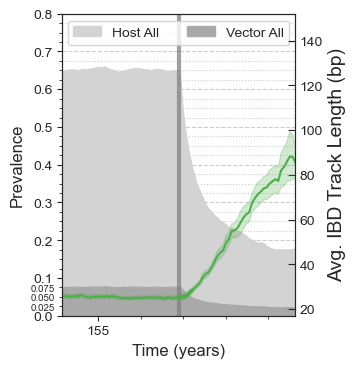

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(3, 4))


# Host Prevalence
ax.fill_between(x=op["t0"], y1=0, y2=op["HX"], color="lightgrey", linewidth=0.8, label="Host All")

# Vector Prevalence
ax.fill_between(x=op["t0"], y1=0, y2=op["VX"], color="darkgrey", linewidth=0.8, label="Vector All")



# Delineate Epochs
ax.axvline(epoch_df.loc["Crash", "t0"], 
           color="grey", alpha=0.75,
           linewidth=3,
           zorder=2)
ax.axvline(epoch_df.loc["Recovery", "t0"], 
           color="grey", alpha=0.75,
           linewidth=3,
           zorder=2)


# Limits
ax.set_ylim([0, 0.8])
if time_limits is not None:
    ax.set_xlim(time_limits)
else:
    epoch_t0 = epoch_df.iloc[0].t0
    epoch_t1 = epoch_df.iloc[-1].t1
    time_limits = [epoch_t0, epoch_t1]
    ax.set_xlim(time_limits)
    
# Ticks, y-axis
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.025))
ax.yaxis.set_minor_formatter(plt.FuncFormatter(lambda val, num: "%.03f" % val if num <= 3 else ""))
ax.tick_params('y', which='minor', labelsize=7)

# Ticks, x-axis
days_per_year = 365
years_per_major_tick = 5

# ax.tick_params(axis='both', which='major', direction='in', length=10, labelsize=10)
# ax.tick_params(axis='both', which='minor', direction='in', length=8, labelsize=10)
ax.xaxis.set_major_locator(plt.MultipleLocator(days_per_year * years_per_major_tick))
ax.xaxis.set_minor_locator(plt.MultipleLocator(days_per_year))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda v, i : int(v / days_per_year)))


# Labels
ax.set_ylabel("Prevalence", fontsize=12)
ax.set_xlabel("Time (years)", fontsize=12)

# Grid
ax.grid(axis="y", linestyle="dashed", zorder=-2)
ax.grid(axis="y", which="minor", linestyle="dotted", zorder=-2)

# Legend
leg = ax.legend(loc="upper center", ncol=2, fontsize=10)
for l in leg.legendHandles:
    l.set_linewidth(1.0)
    
    
# Plot Genetic Diversity Lines
metric = "avg_l_ibd"
# Twin axisa
axm = ax.twinx()

# Plot
axm.plot(og["t0"], og[metric], color=m_dt[metric], linewidth=1.5)
axm.fill_between(x=og["t0"],
                 y1=og[metric] - og_se[metric] * n_se,
                 y2=og[metric] + og_se[metric] * n_se,
                 color=m_dt[metric], alpha=se_alpha)
axm.set_ylabel(genetic_names[metric], fontsize=14)
axm.tick_params(axis='y', which='major', direction='in', length=5, labelsize=10)
axm.set_xlim(time_limits)
    
if savefig:
    fig.savefig("../figs/timecourse_intervention-avg_%s.pdf" % metric, 
                bbox_inches="tight", pad_inches=0.5)
    fig.savefig("../figs/timecourse_intervention-avg_%s.png" % metric, 
                bbox_inches="tight", pad_inches=0.5)

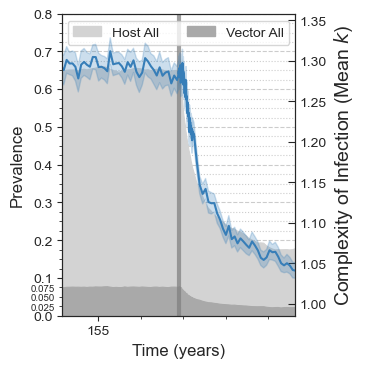

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(3, 4))


# Host Prevalence
ax.fill_between(x=op["t0"], y1=0, y2=op["HX"], color="lightgrey", linewidth=0.8, label="Host All")

# Vector Prevalence
ax.fill_between(x=op["t0"], y1=0, y2=op["VX"], color="darkgrey", linewidth=0.8, label="Vector All")



# Delineate Epochs
ax.axvline(epoch_df.loc["Crash", "t0"], 
           color="grey", alpha=0.75,
           linewidth=3,
           zorder=2)
ax.axvline(epoch_df.loc["Recovery", "t0"], 
           color="grey", alpha=0.75,
           linewidth=3,
           zorder=2)


# Limits
ax.set_ylim([0, 0.8])
if time_limits is not None:
    ax.set_xlim(time_limits)
else:
    epoch_t0 = epoch_df.iloc[0].t0
    epoch_t1 = epoch_df.iloc[-1].t1
    time_limits = [epoch_t0, epoch_t1]
    ax.set_xlim(time_limits)
    
# Ticks, y-axis
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.025))
ax.yaxis.set_minor_formatter(plt.FuncFormatter(lambda val, num: "%.03f" % val if num <= 3 else ""))
ax.tick_params('y', which='minor', labelsize=7)

# Ticks, x-axis
days_per_year = 365
years_per_major_tick = 5

# ax.tick_params(axis='both', which='major', direction='in', length=10, labelsize=10)
# ax.tick_params(axis='both', which='minor', direction='in', length=8, labelsize=10)
ax.xaxis.set_major_locator(plt.MultipleLocator(days_per_year * years_per_major_tick))
ax.xaxis.set_minor_locator(plt.MultipleLocator(days_per_year))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda v, i : int(v / days_per_year)))


# Labels
ax.set_ylabel("Prevalence", fontsize=12)
ax.set_xlabel("Time (years)", fontsize=12)

# Grid
ax.grid(axis="y", linestyle="dashed", zorder=-2)
ax.grid(axis="y", which="minor", linestyle="dotted", zorder=-2)

# Legend
leg = ax.legend(loc="upper center", ncol=2, fontsize=10)
for l in leg.legendHandles:
    l.set_linewidth(1.0)
    
    
# Plot Genetic Diversity Lines
metric = "mean_k"
# Twin axisa
axm = ax.twinx()

# Plot
axm.plot(og["t0"], og[metric], color=m_dt[metric], linewidth=1.5)
axm.fill_between(x=og["t0"],
                 y1=og[metric] - og_se[metric] * n_se,
                 y2=og[metric] + og_se[metric] * n_se,
                 color=m_dt[metric], alpha=se_alpha)
axm.set_ylabel(genetic_names[metric], fontsize=14)
axm.tick_params(axis='y', which='major', direction='in', length=5, labelsize=10)
axm.set_xlim(time_limits)
    
if savefig:
    fig.savefig("../figs/timecourse_intervention-avg_%s.pdf" % metric, 
                bbox_inches="tight", pad_inches=0.5)
    fig.savefig("../figs/timecourse_intervention-avg_%s.png" % metric, 
                bbox_inches="tight", pad_inches=0.5)

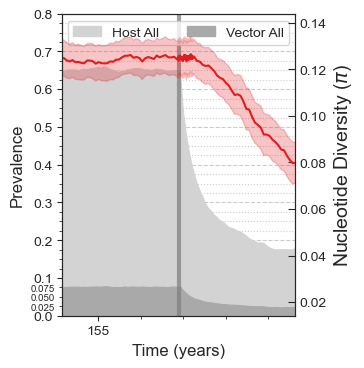

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(3, 4))


# Host Prevalence
ax.fill_between(x=op["t0"], y1=0, y2=op["HX"], color="lightgrey", linewidth=0.8, label="Host All")

# Vector Prevalence
ax.fill_between(x=op["t0"], y1=0, y2=op["VX"], color="darkgrey", linewidth=0.8, label="Vector All")



# Delineate Epochs
ax.axvline(epoch_df.loc["Crash", "t0"], 
           color="grey", alpha=0.75,
           linewidth=3,
           zorder=2)
ax.axvline(epoch_df.loc["Recovery", "t0"], 
           color="grey", alpha=0.75,
           linewidth=3,
           zorder=2)


# Limits
ax.set_ylim([0, 0.8])
if time_limits is not None:
    ax.set_xlim(time_limits)
else:
    epoch_t0 = epoch_df.iloc[0].t0
    epoch_t1 = epoch_df.iloc[-1].t1
    time_limits = [epoch_t0, epoch_t1]
    ax.set_xlim(time_limits)
    
# Ticks, y-axis
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.025))
ax.yaxis.set_minor_formatter(plt.FuncFormatter(lambda val, num: "%.03f" % val if num <= 3 else ""))
ax.tick_params('y', which='minor', labelsize=7)

# Ticks, x-axis
days_per_year = 365
years_per_major_tick = 5

# ax.tick_params(axis='both', which='major', direction='in', length=10, labelsize=10)
# ax.tick_params(axis='both', which='minor', direction='in', length=8, labelsize=10)
ax.xaxis.set_major_locator(plt.MultipleLocator(days_per_year * years_per_major_tick))
ax.xaxis.set_minor_locator(plt.MultipleLocator(days_per_year))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda v, i : int(v / days_per_year)))


# Labels
ax.set_ylabel("Prevalence", fontsize=12)
ax.set_xlabel("Time (years)", fontsize=12)

# Grid
ax.grid(axis="y", linestyle="dashed", zorder=-2)
ax.grid(axis="y", which="minor", linestyle="dotted", zorder=-2)

# Legend
leg = ax.legend(loc="upper center", ncol=2, fontsize=10)
for l in leg.legendHandles:
    l.set_linewidth(1.0)
    
    
# Plot Genetic Diversity Lines
metric = "pi"
# Twin axisa
axm = ax.twinx()

# Plot
axm.plot(og["t0"], og[metric], color=m_dt[metric], linewidth=1.5)
axm.fill_between(x=og["t0"],
                 y1=og[metric] - og_se[metric] * n_se,
                 y2=og[metric] + og_se[metric] * n_se,
                 color=m_dt[metric], alpha=se_alpha)
axm.set_ylabel(genetic_names[metric], fontsize=14)
axm.tick_params(axis='y', which='major', direction='in', length=5, labelsize=10)
axm.set_xlim(time_limits)
    
if savefig:
    fig.savefig("../figs/timecourse_intervention-avg_%s.pdf" % metric, 
                bbox_inches="tight", pad_inches=0.5)
    fig.savefig("../figs/timecourse_intervention-avg_%s.png" % metric, 
                bbox_inches="tight", pad_inches=0.5)